<H3>CSE587: Data Intensive Computing</H3>
<H4>Lab 1: Part 1</H4>
Author:<br>
Rajat Rajendra Thosar <br>
Teammate:<br>Shreya Chatterjee

<H2>Problem 1</H2>
Poisson Probability Distribution<br>
<img src="rpois.jpg"><a href = "https://homepage.divms.uiowa.edu/~mbognar/applets/pois.html">Source </a> 

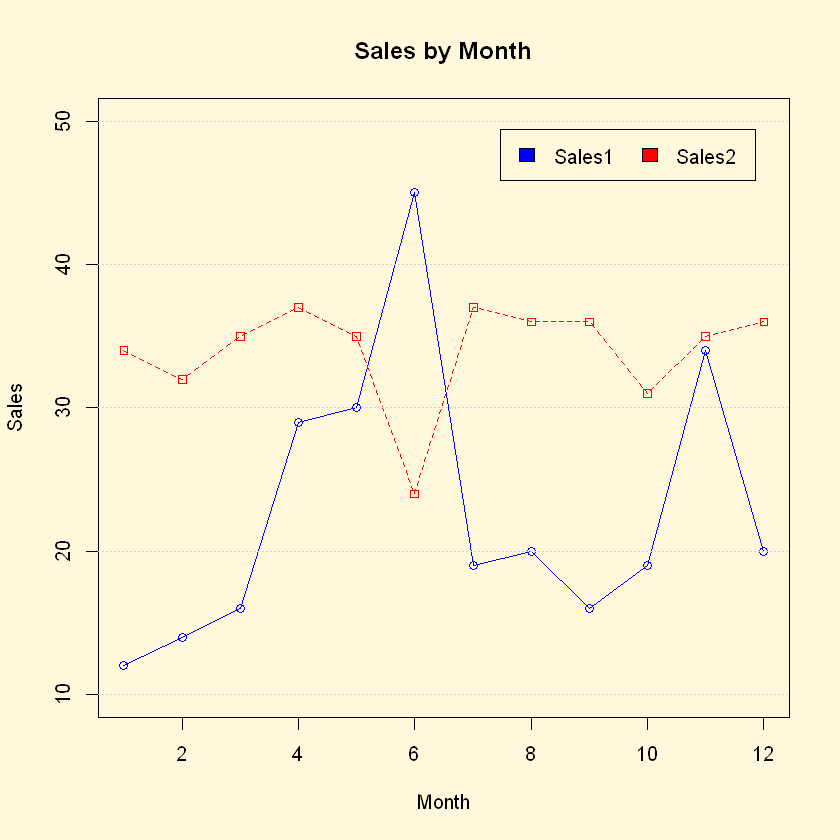

In [28]:
# Sales1 is a combined list of the mentioned datapoints. The function c(args) is used 
# -to bind multiple datapoints into a single vector
sales1<-c(12,14,16,29,30,45,19,20,16, 19, 34, 20)

# random numbers, Poisson distribution, mean at 34, 12 numbers
sales2<-rpois(12,34)  

# Setting the background color of the plot to passed argument
par(bg="cornsilk")

plot(sales1, col="blue", type="o", ylim=c(10,50), xlab="Month", ylab="Sales" )
title(main="Sales by Month")
# The above code plots the datapoints contained in sales1 within the Y-axis limits of 0 to 100. The type of the plot chosen: Overplotted

lines(sales2, type="o", pch=22, lty=2, col="red")
# The above code plots the datapoints contained in sales2.

grid(nx=NA, ny=NULL)
legend("topright", inset=.05, c("Sales1","Sales2"), fill=c("blue","red"), horiz=TRUE)


<H3>Problem 1 Discussions and observations:</H3>

This Poisson Distribution has very low probability of getting a datapoint close to the lower bound of sales1.

In this case, p(x=12) = 0.00001. 

Here, 90% of the probability distribution is enveloped in the range (23,45) as shown in the plot in the Markdown section above
This implies that, whenever new datapoints are created from the random seed with Poisson Distribution, the datapoints bearing values from 24 to 44 have a 90% chance of appearing in the data, while anything other than these values have a lower probability.
This fact is evident from various runs of the code.

<hr><hr><br><br><H2>Problem 2</H2>

Loading required package: reshape2


Sales1,Sales2
34,45
23,23
12,56
29,34
34,45
34,56
12,89
80,36
80,44
56,66


No id variables; using all as measure variables
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


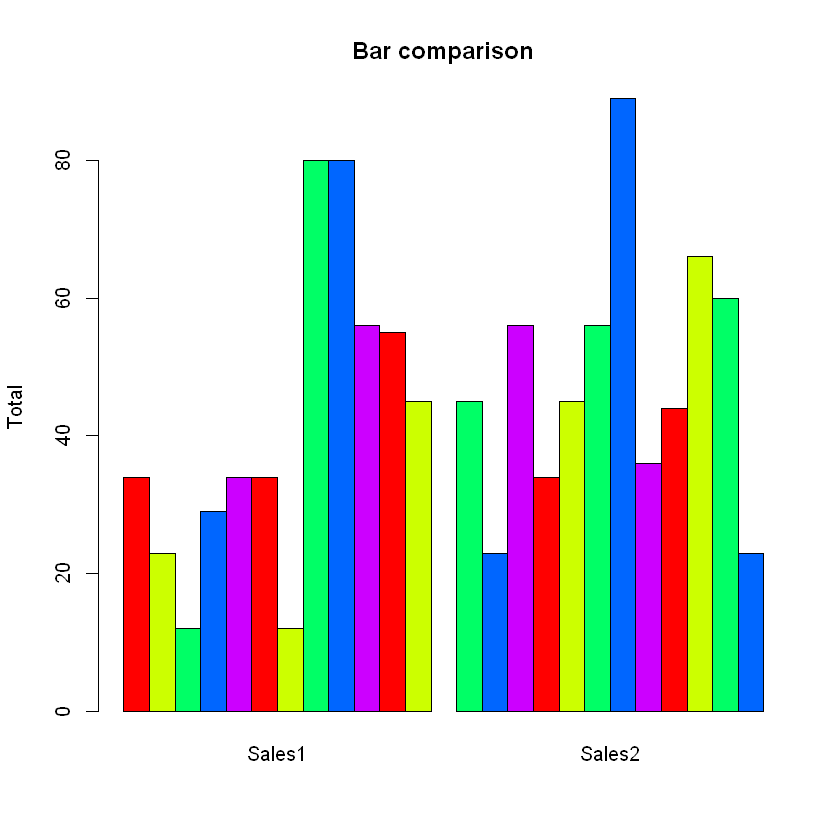

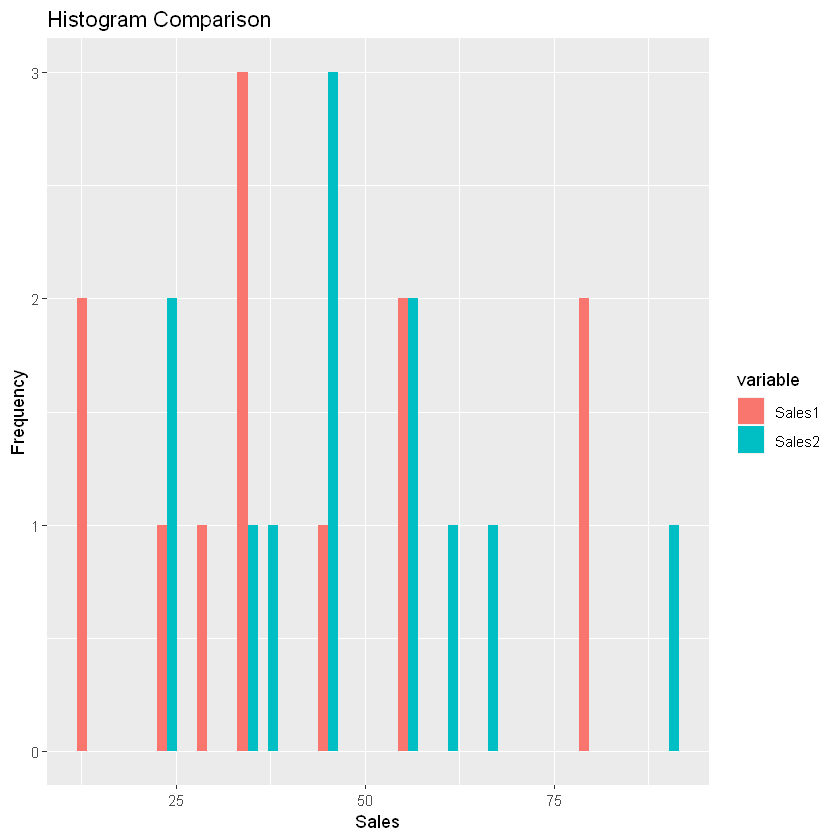

In [17]:
# require(lib) attaches add-on libraries to current code.
# It enables us to use the functions available in 
# -such libraries
require(ggplot2)
require(reshape2)

# file.choose() invokes an interface that can be used to feed a file to the program (often, a .csv). 
# The header attribute indicates to the function that the file being fed has column headers or not.
# read.table(file) reads the data from a file and converts it into a data.frame
# The data.frame is then assigned to sales variable
sales<-read.table(file.choose(), header=T)
sales  # to verify that data has been read

# Here, we have split the Sales1 and Sales2 data from master data.frame into two different vectors
First.sales <-sales$Sales1
Second.sales <-sales$Sales2

# Following is side-by-side barplot comparison of the datapoints in the master data.frame
barplot(as.matrix(sales), main="Bar comparison", ylab="Total",beside=T, col=rainbow(5))
#hist(as.matrix(First.sales), main="Sales 1 Data", ylab= "Total",beside=T, col=rainbow(5))
#hist(as.matrix(Second.sales), main="Sales 2 Data", ylab= "Total",beside=T, col=rainbow(5))

# Plot side-by-side histograms of sales1 and sales2 data 
ggplot(melt(sales), aes(value, fill = variable)) + geom_histogram(position = "dodge") + labs(y = "Frequency", x = "Sales") + ggtitle("Histogram Comparison")

<H3>Problem 2 Discussion and Observations:</H3>
Histogram of a dataset provides the frequency distribution of a datapoint in that dataset. Here, the maximum freqency is centered around 34 for sales1 and 44 for sales2.
From  the histogram, we observe that sales2 performs better than sales1. Sales1 has a mean of 41.167, while sales2 has a mean of 48.083. However, sales2 contains a datapoint 89 which lies far away from the trend of the data in sales2. There is a possibility that the datapoint 89 is an outlier. If we remove 89 from the data and find the mean over 11 datapoints, it comes out to be 44.36. This significant change in the mean by removal of one datapoint backs the opinion that 89 can be an outlier in the data. 

<hr><hr><br><br><H2>Problem 3</H2>

[1] 45

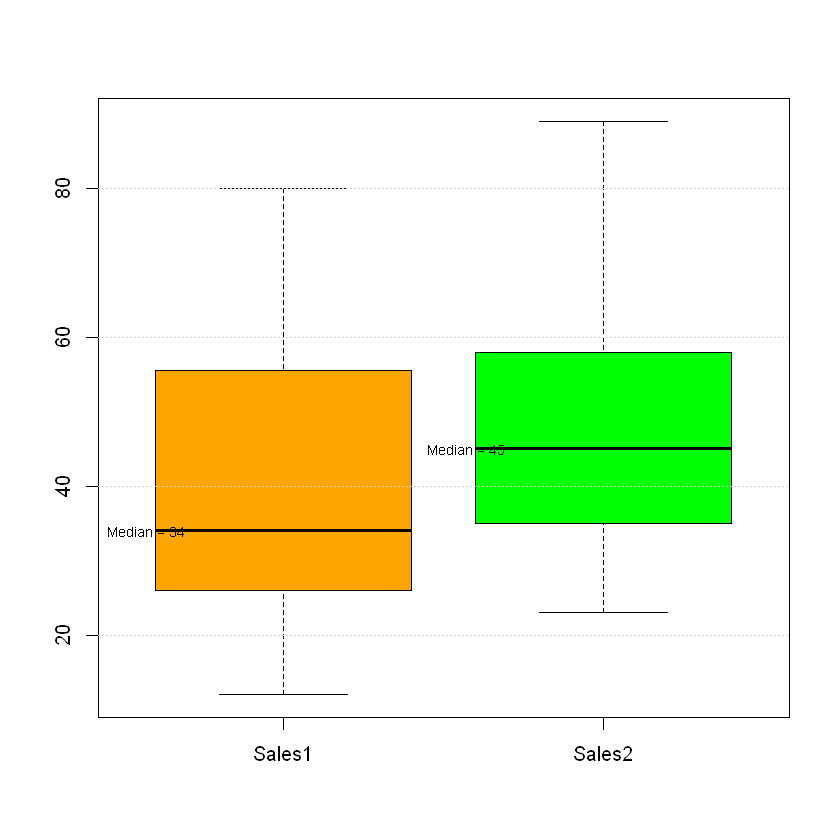

In [14]:
# boxplot() creates a boxplot of the list passed in the arguments.
fn<-boxplot(sales,col=c("orange","green"))$stats

# text() is used to display text over a plot. The paste() function joins two or more character vectors.
# The parameter adj is used to align the text in X and Y direction. The parameter cex is used to scale 
# -the text.
text(1.45, fn[3,2], paste("Median =", fn[3,2]), adj=0, cex=.7)
text(0.45, fn[3,1],paste("Median =", fn[3,1]), adj=0, cex=.7)
grid(nx=NA, ny=NULL)

<H3>Problem 3 Discussion and Observations:</H3>
<h6>Convention followed: Bottom quartile is First Quartile and top quartile is Third Quartile</h6>
The boxplots indicate the spread of the data over a range of values. <br> Here, the boxplot for Sales1 data, say Boxplot1, shows that Sales1 has a range of [12, 80]. The boxplot of Sales2 data, say Boxplot2, shows that Sales2 ranges from [23, 89]. <br>Boxplot1 has a median of 34 while Boxplot2 has a median of 45.<br>In Boxplot1, the segment [First Quartile, Median] is the most dense in terms of number of datapoints per segment of the range. The ranges [Median, Third Quartile] and [Third Quartile, End of data] are equally dense, each containing 2 datapoints. In Boxplot2, the segment [Third Quartile, End of data] is the sparest segment containing only one datapoint. [Beginning of data, First Quartile] and [First Quartile, Median] contain 3 datapoints each, while [Median, Third Quartile] contains 4 datapoints.

<hr><hr><br><br><H2>Problem 4</H2>

[1] 167.43

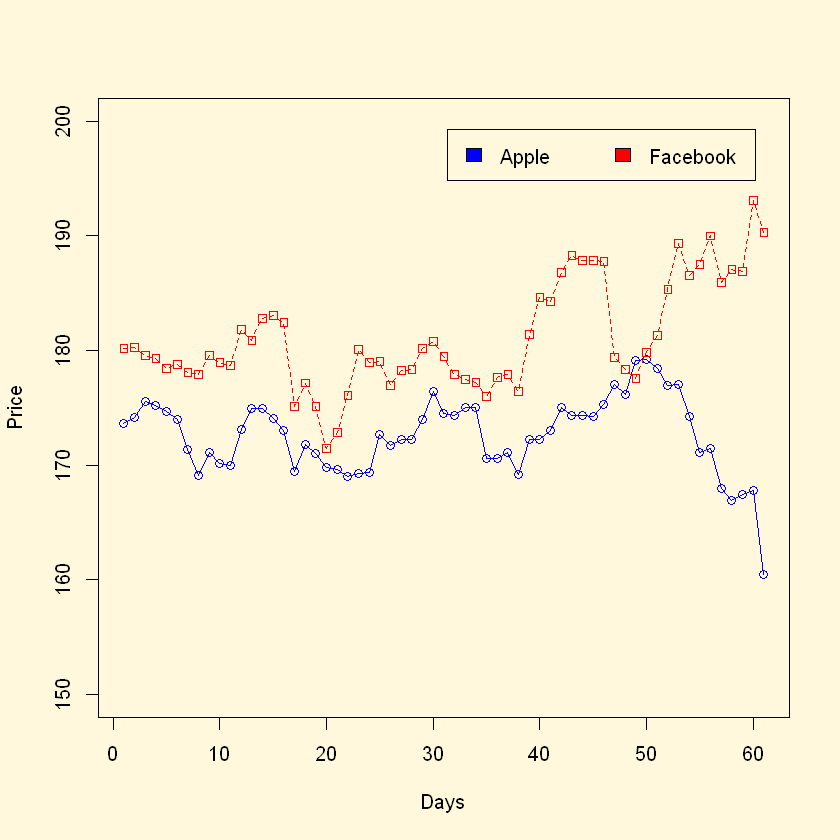

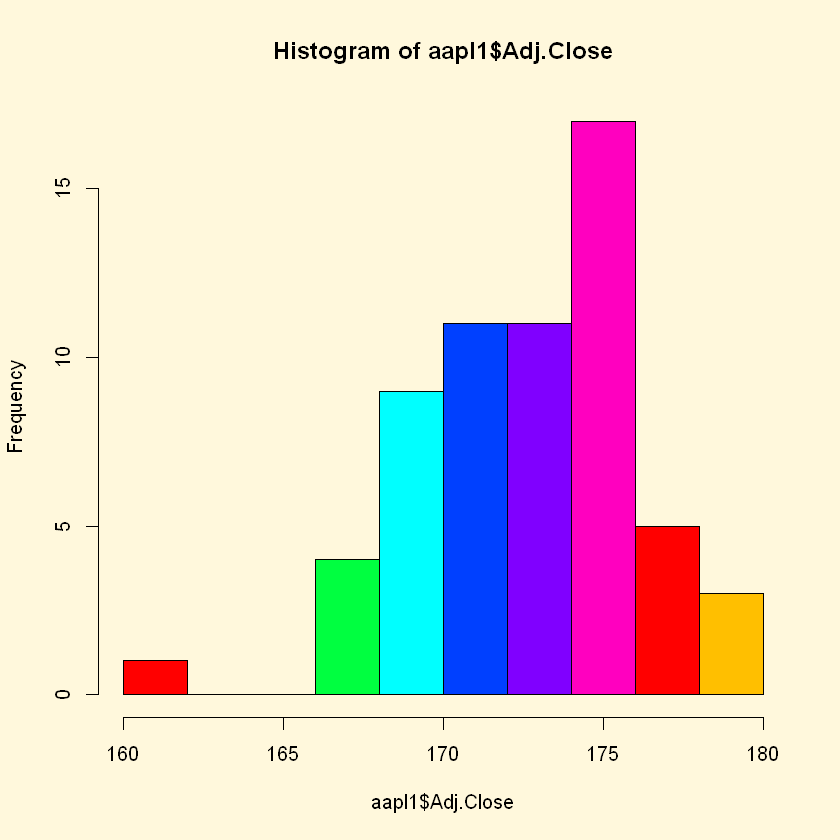

In [27]:
# read.csv() takes a file input in /csv format and converts it into a data.frame
fb1<-read.csv(file.choose())
aapl1<-read.csv(file.choose())
par(bg="cornsilk")

# Here we plot the Adj.Close vector in the aapl1 data.frame. The ylim(start, end) is adjusted to fit the graph on the canvas
plot(aapl1$Adj.Close, col="blue", type="o", ylim=c(150,200), xlab="Days", ylab="Price" )

# fb1.$Adj.Close
# aapl1.$Adj.Close 

# lines() draws a line ove the points passed in the arguments.
# The parameter pch decides the shape of the datapoints on the plot and lty decides the linetype
lines(fb1$Adj.Close, type="o", pch=22, lty=2, col="red")
legend("topright", inset=.05, c("Apple","Facebook"), fill=c("blue","red"), horiz=TRUE)

# hist() creates a histogram of vector passed in its arguments. 
# Here we plot the histogram of Adj.Close column of aapl1 data.frame
hist(aapl1$Adj.Close, col=rainbow(8))

<H3>Problem 4 Analysis:</H3>
<h6>General Analysis:</h6>
The plots of closing stock prices of Apple and Facebook show that Facebook (FB) has been performing better than Apple (AAPL) throughout the 60 days of observation. Apart from the exception of day 49, where Apple leads Facebook by 1.5 points, Facebook has had a consistent lead over Apple. This lead increases to 25.31 points at the end of day 60. After a lag of 1.5 points on day 49, prices for FB climb rapidly. For instance, FB jumps by 4.08 points to 185.37 on day 52 from day 51. This is their second rapidest climb during the observation after a climb of 4.96 points between day 38 and day 39. 
On the other hand, after day 49, Apple has consistently suffered from loss of points.
<h6>Histogram Analysis:</h6>
The histogram of Apple's closing stock prices shows that the interval of stock values of [174, 176] has the highest number of occurances, 17. The range [168, 174] produces 31 datapoints, which is 51.67% of the total data. This range also contains the mean = 172.635055295082 and the median = 173.03 of the distribution. On day 60, the prices drop from 167.43 to 160. This explains the absence of values in the range [162, 166]. 

<hr><hr><br><br><H2>Problem 5</H2>

In [54]:
# Lists all the available datasets
data()
attach(attitude)
head(attitude)
summary(attitude)
detach(attitude)

The following objects are masked from attitude (pos = 8):

    advance, complaints, critical, learning, privileges, raises, rating



rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


     rating        complaints     privileges       learning         raises     
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    critical        advance     
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

In [55]:
# install.packages() installs a package that can be imported with library() function
install.packages("ggplot2")
library("ggplot2")

# attach() is used to add a database to the R path so that its contents can be accessed directly by its variable names
attach(mpg)

# head() returns the first part of a data entity (vector, matrix, table, data.frame)
head(mpg)

# summary() produces result summaries of the data passed in the arguments.
# The class of the first argument decides the methods that are invoked to get the summary.
summary(mpg)

# Get the unique years listed in the database when cars were manufactured
uniqueYears <- unique(mpg$year)

# str(mpg)
# Here, we have created a for loop that iterates over the unique years in 
for (years in uniqueYears){
    print(paste("The number of cars made in the year ",years, " are ", length(which(mpg$year == years))))
}
#plot(data.displacement, main="Displacement stats for the year 1999", ylab="Displacement", xlab="Year 1999")
#lines(data.displacement)
#after analysis remove the data from the memory
detach(mpg)


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'ggplot2' is in use and will not be installed"The following object is masked _by_ .GlobalEnv:

    year

The following objects are masked from mpg (pos = 3):

    class, cty, cyl, displ, drv, fl, hwy, manufacturer, model, trans,
    year

The following objects are masked from mpg (pos = 4):

    class, cty, cyl, displ, drv, fl, hwy, manufacturer, model, trans,
    year

The following objects are masked from mpg (pos = 5):

    class, cty, cyl, displ, drv, fl, hwy, manufacturer, model, trans,
    year

The following objects are masked from mpg (pos = 6):

    class, cty, cyl, displ, drv, fl, hwy, manufacturer, model, trans,
    year

The following objects are masked from mpg (pos = 7):

    class, cty, cyl, displ, drv, fl, hwy, manufacturer, model, trans,
    y

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...
[1] "The number of cars made in the year  1999  are  117"
[1] "The number of cars made in the year  2008  are  117"


<H3>Problem 5 Analysis:</H3>
The attached dataset in the problem contains 11 features. The columns manufacturer, model, trans and class are rightfully stated as character vectors. The displ column has a range of [1.6, 7.0] with median at 3.3. This column is correctly stated as a num. The column year has only two values 1999 and 2008. Despite containing only two values, stating this column as an int makes sense as different years can later be added. Due to the fact that the number of datapoints are even and both year values are equally present, the median of the years, 2004, is not present in the actual data. That is, it is the average of the two middle values. The mean of the years column is 2004. The columns cyl (median = 6), cty (median = 17) and hwy (median = 24) are ints. The column drv, however, can be improved. Currently drv is stated as a chr. But drv values are limited. Hence casting it as a Factor with limited levels can be a better option.

[1]  3.93  5.31  7.24  9.64 12.90 17.10

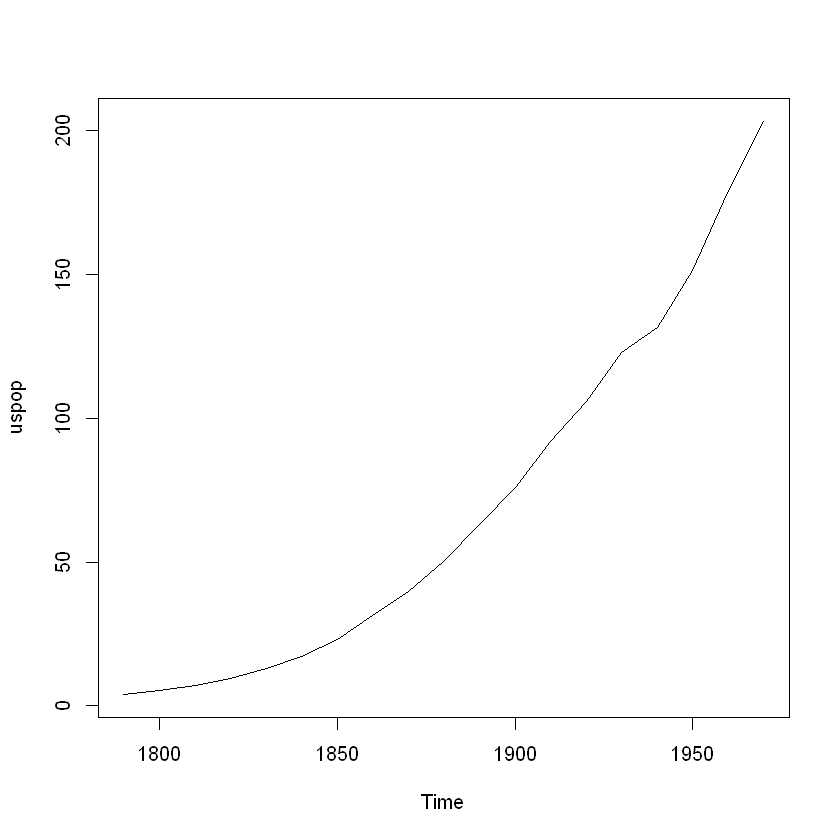

In [33]:
library(datasets)
#USPop is a Time Series. Absence of year in head. Search for USPop on Kaggle. What is Frequency?
head(uspop)
plot(uspop)

<b>USPop Analysis:</b>
The USPop is US Population dataset which logs the population in millions from 1790 to 1970. The graph explains the exponential growth of the population throughout the given timespan. There is, however, a slow growth during the 1940s. This can be associated with the events of World War 2.

<hr><hr><br><br><H2>Problem 6</H2>

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rtsil\AppData\Local\Temp\Rtmp06FVEO\downloaded_packages


Skipping install of 'ggmap' from a github remote, the SHA1 (b2558f99) has not changed since last install.
  Use `force = TRUE` to force installation
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'maptools' is in use and will not be installed"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'ggplot2' is in use and will not be installed"Source : https://maps.googleapis.com/maps/api/geocode/json?address=SFO&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Mumbai&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=London&key=xxx-ClwzKn4p6G9xL

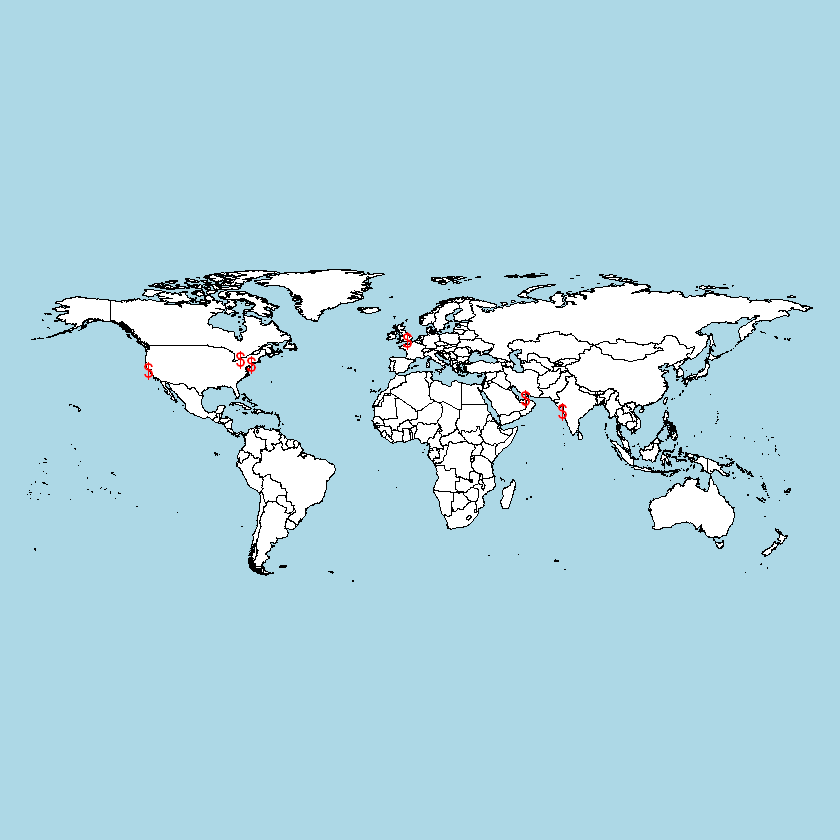

In [15]:
# Install devtools package dependency which is needed to get ggmap
install.packages("devtools")

# Install ggmap
devtools::install_github("dkahle/ggmap") 
ref = ("tidyup")

# Install maptools and ggplot2 libraries
install.packages("maptools")
install.packages("ggplot2")

library("ggmap")
library("maptools")
library("maps")

# Use the Google Maps API Key to register an API and set up Google Maps for this session.
# In order to enhance the security, the key has been added to the development system as
# -an environment variable. The same environment variable is accessed below.
register_google(key = Sys.getenv("GMapAPI")) 

# Add the below mentioned cities to the list of visited places.
visited <- c("SFO", "Mumbai", "London", "Dubai", "New York", "Buffalo, NY")

# Following line finds the latitudes and longitudes of the visited places
ll.visited <- geocode(visited)
visit.x <- ll.visited$lon
visit.y <- ll.visited$lat

# Draw a map with a $ sign for every visited place
map("world", fill=TRUE, col="white", bg="lightblue", ylim=c(-60, 90), mar=c(0,0,0,0))
points(visit.x,visit.y, col="red", pch=36)

<H3>Problem 6 Discussion:</H3>
This problem integrates Google Maps API with R. A list of cities is compiled into a vector and passed as argument to geocode() function. geocode() uses Google Maps to find the latitude and lognitude of each entered place. To consume these functions, an API registration is required beforehand. This registration is done with an API key provided by Google. After a successful verification of the API Key, the APIs and functions are exposed to the programmer to consume. As sending the key as an unencrypted string is not very secure, we create an environment variable in the system that holds the key, and call that environment variable in the code.

Source : https://maps.googleapis.com/maps/api/geocode/json?address=SFO&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+York&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Los+Angeles&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Buffalo&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Dallas,+TX&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Alexandria&key=xxx-ClwzKn4p6G9xLzKzJ9Lc
"Alexandria" not uniquely geocoded, using "alexandria, va, usa"


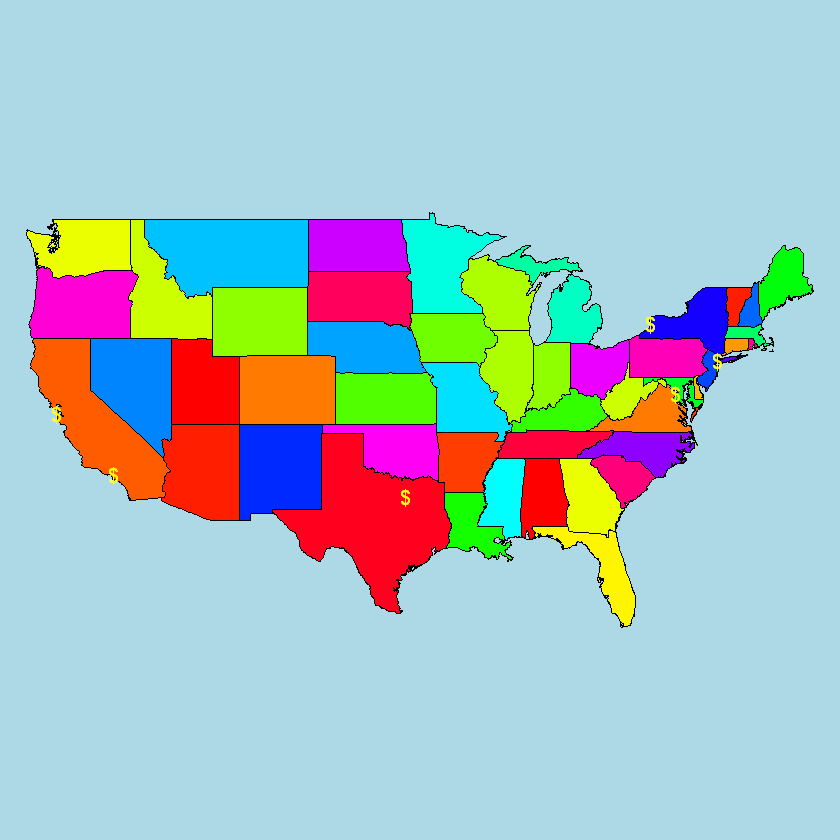

In [16]:
library("ggmap")
library("maptools")
library(maps)
visited <- c("SFO", "New York", "Los Angeles" ,"Buffalo", "Dallas, TX", "Alexandria")
ll.visited <- geocode(visited)
visit.x <- ll.visited$lon
visit.y <- ll.visited$lat
map("state", fill=TRUE, col=rainbow(50), bg="lightblue", mar=c(0,0,0,0))
points(visit.x,visit.y, col="yellow", pch=36)

If there are multiple places with same name, that is, if programmer fails to uniquely describe the place, geocode() uses the first element found by that name as the place. If the function cannot recognize the place, it throws an error for that location and plots the rest of the identified locations.

<hr><hr><br><br><H2>Problem 7</H2>

The following objects are masked _by_ .GlobalEnv:

    hp, mpg

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


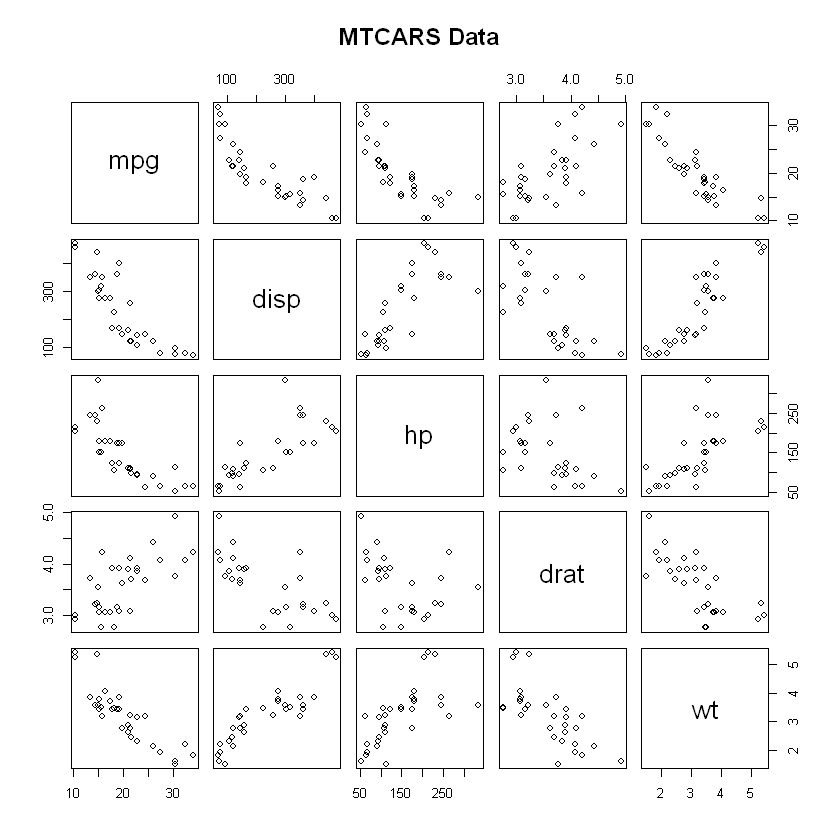

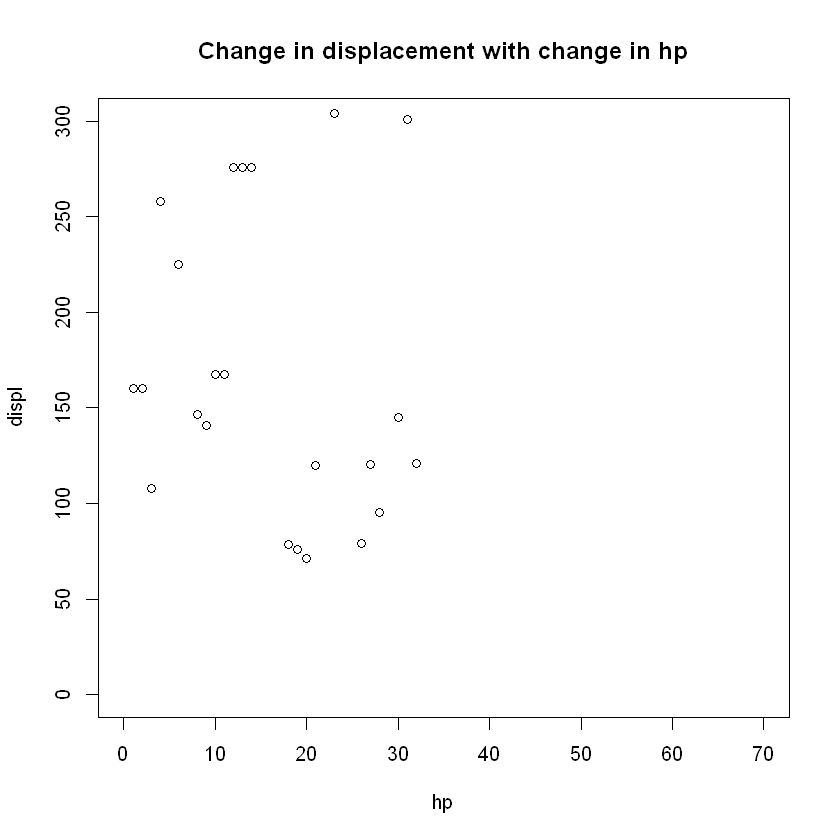

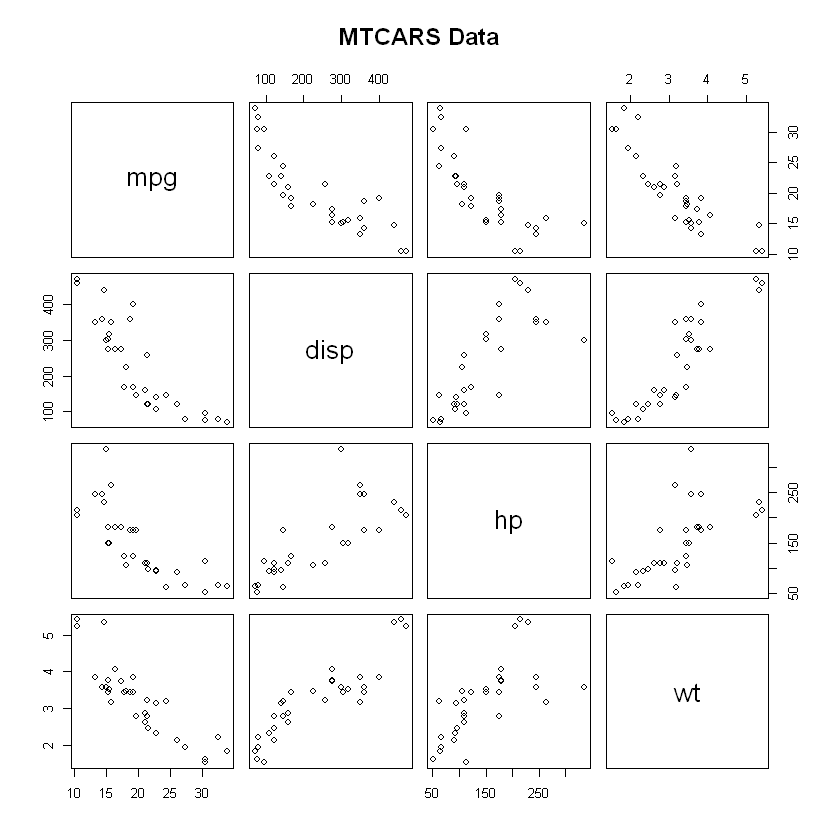

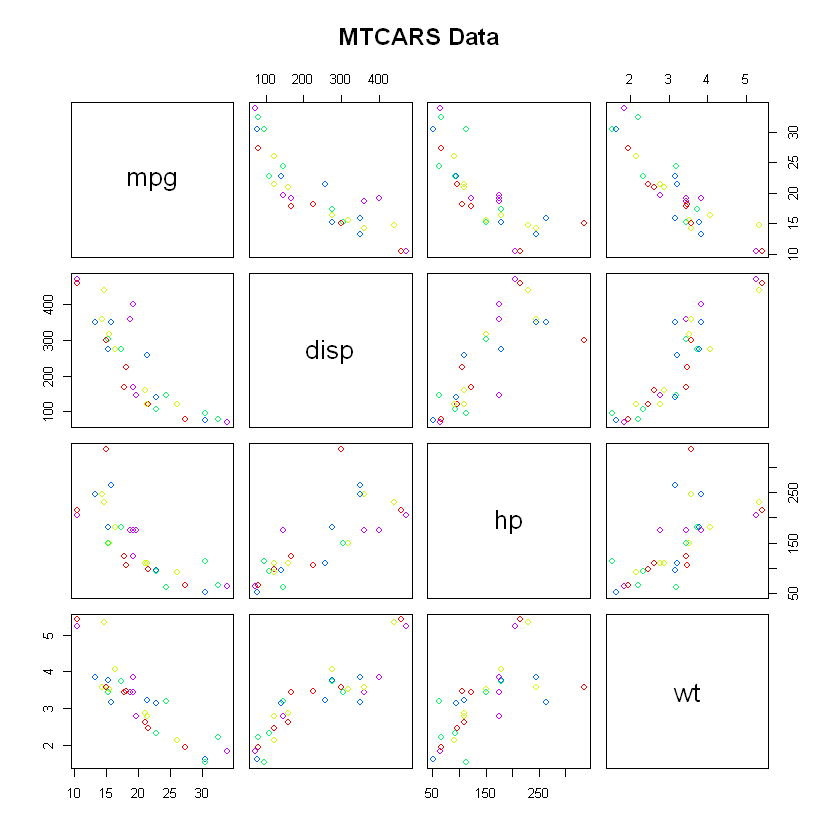

In [11]:
# Attach mtcars dataset to the code
attach(mtcars)
head(mtcars)

# Plot the columns 1,3,4,5 and 6 from mtcars dataset.
plot(mtcars[c(1,3,4,5,6)], main="MTCARS Data")
plot(mtcars[c(1,3,4,6)], main="MTCARS Data")

# Use of colors to plot the above graph
plot(mtcars[c(1,3,4,6)], col=rainbow(5),main="MTCARS Data")
detach(mtcars)


[1] 112 118 132 129 121 135

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

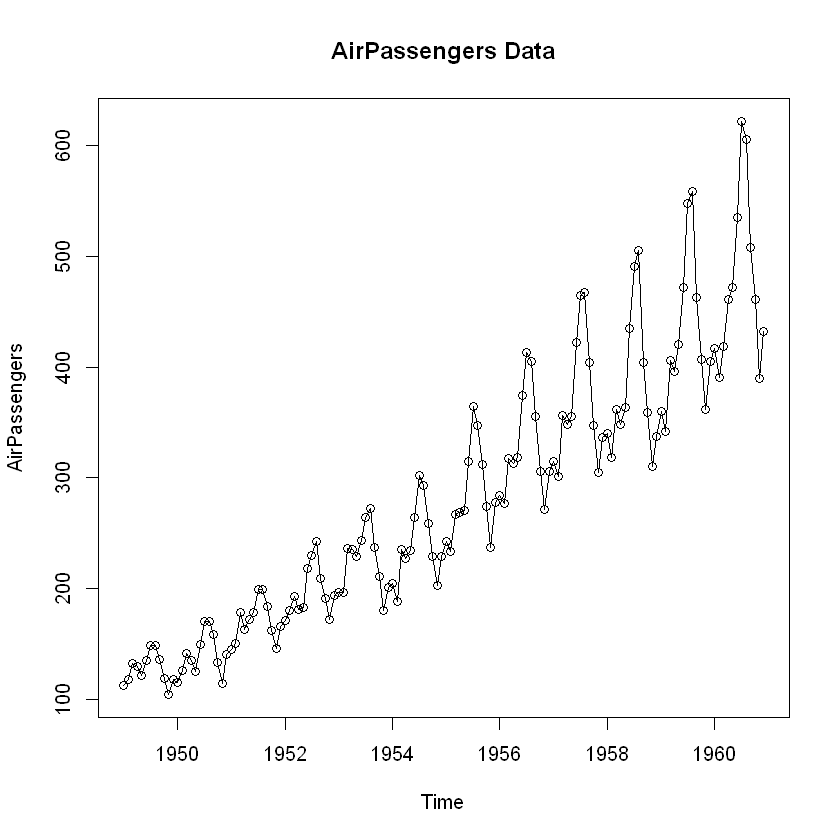

In [13]:
# Import the library datasets
library(datasets)

# Get the first records for the dataset AirPassengers in the datasets package
head(AirPassengers)
summary(AirPassengers)
# Plot the number of passengers in January for the first 5 years of data
plot(AirPassengers, main="AirPassengers Data", type="o")

<H3>Problem 7 discussion:</H3>
The graph drawn above shows the relationship between the number of Airline Passengers from 1949 through 1961. The overall trend shows a growth in the number of passengers. The graph follows a pattern of sharp rise in passengers during the months from June to August of every year. This recurring pattern can be associated with the growth in passengers due to summer vacations. This information is key point in Business Analysis as the airlines can employ offers and schemes to attract more passengers in the blooming seasons.

<hr><hr><br><br><H2>Problem 8</H2>

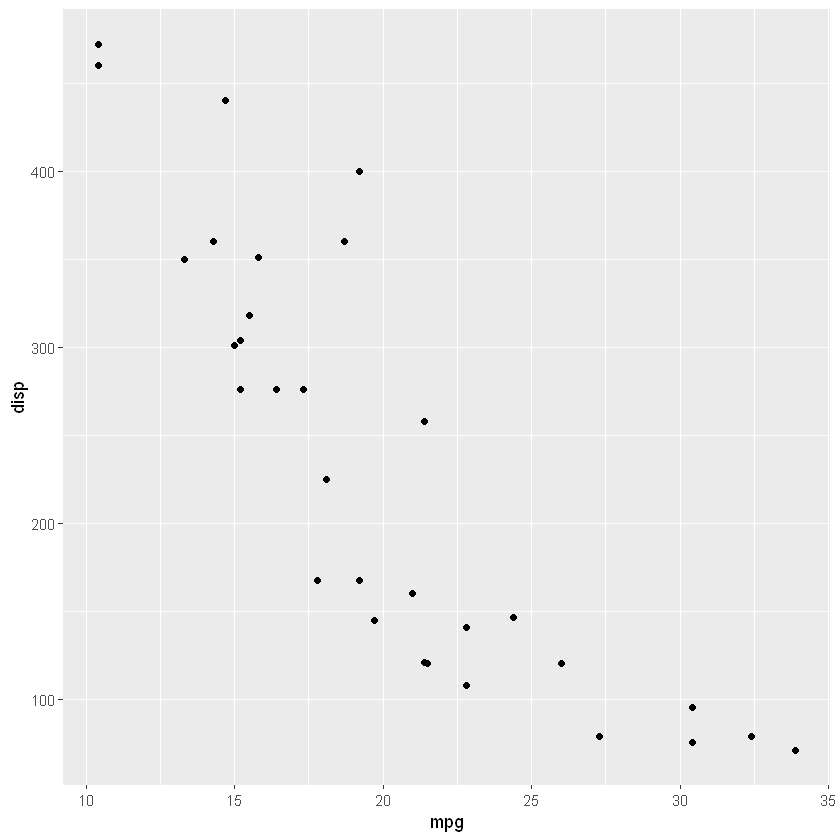

In [38]:
# Include ggplot2 in the current snippet
library(ggplot2)

# Here, we plot the datapoints in mtcars. The coordinates of the points are assigned from the mpg and disp columns of the dataset. 
# This function is appended with geom_point() function which is used to create scatterplots. 
ggplot(mtcars, aes(x=mpg, y=disp)) + geom_point()